In [2]:
import polars as pl
import os
import glob
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

In [ ]:
path = [r'C:\Users\USER\PEF\Terrain-Traversability-Analysis\adoquin_features', 
        r'C:\Users\USER\PEF\Terrain-Traversability-Analysis\asfalto_features',
        r'C:\Users\USER\PEF\Terrain-Traversability-Analysis\concreto_features',
        r'C:\Users\USER\PEF\Terrain-Traversability-Analysis\grava_features',
        r'C:\Users\USER\PEF\Terrain-Traversability-Analysis\pasto_features']

csv_files = []

for i in path:
    csv_files.extend(glob.glob(os.path.join(i, '*.csv')))
    
df = pl.concat([pl.read_csv(file) for file in csv_files])

df.head()

In [ ]:
le = LabelEncoder()
df = df.with_columns(
    pl.Series('Class', le.fit_transform(df['Class']))
)

df.write_csv(r'C:\Users\USER\PEF\Terrain-Traversability-Analysis\terrain_features.csv')

shape: (5, 13)
┌───────────┬───────────┬──────────┬──────────┬───┬────────────┬─────┬─────────────────────┬───────┐
│ Xnorm     ┆ Ynorm     ┆ Znorm    ┆ VarZ     ┆ … ┆ RANGE (mm) ┆ ROW ┆ DESTAGGERED IMAGE   ┆ Class │
│ ---       ┆ ---       ┆ ---      ┆ ---      ┆   ┆ ---        ┆ --- ┆ COLUMN              ┆ ---   │
│ f64       ┆ f64       ┆ f64      ┆ f64      ┆   ┆ i64        ┆ i64 ┆ ---                 ┆ i64   │
│           ┆           ┆          ┆          ┆   ┆            ┆     ┆ i64                 ┆       │
╞═══════════╪═══════════╪══════════╪══════════╪═══╪════════════╪═════╪═════════════════════╪═══════╡
│ -0.024746 ┆ -0.005636 ┆ 0.999678 ┆ 0.000007 ┆ … ┆ 3070       ┆ 59  ┆ 275                 ┆ 0     │
│ -0.024746 ┆ -0.005636 ┆ 0.999678 ┆ 0.000007 ┆ … ┆ 3027       ┆ 59  ┆ 276                 ┆ 0     │
│ -0.052566 ┆ 0.012975  ┆ 0.998533 ┆ 0.000014 ┆ … ┆ 2955       ┆ 60  ┆ 276                 ┆ 0     │
│ -0.057049 ┆ -0.022985 ┆ 0.998107 ┆ 0.000012 ┆ … ┆ 2849       ┆ 61  ┆ 276                 ┆ 0     │
│ -0.019243 ┆ -0.021422 ┆ 0.999585 ┆ 0.000007 ┆ … ┆ 3098       ┆ 58  ┆ 277                 ┆ 0     │
└───────────┴───────────┴──────────┴──────────┴───┴────────────┴─────┴─────────────────────┴───────┘

In [3]:
df = pl.read_csv(r'C:\Users\USER\PEF\Terrain-Traversability-Analysis\terrain_features.csv')

df

shape: (10_527_494, 13)
┌───────────┬───────────┬──────────┬──────────┬───┬────────────┬─────┬─────────────────────┬───────┐
│ Xnorm     ┆ Ynorm     ┆ Znorm    ┆ VarZ     ┆ … ┆ RANGE (mm) ┆ ROW ┆ DESTAGGERED IMAGE   ┆ Class │
│ ---       ┆ ---       ┆ ---      ┆ ---      ┆   ┆ ---        ┆ --- ┆ COLUMN              ┆ ---   │
│ f64       ┆ f64       ┆ f64      ┆ f64      ┆   ┆ i64        ┆ i64 ┆ ---                 ┆ i64   │
│           ┆           ┆          ┆          ┆   ┆            ┆     ┆ i64                 ┆       │
╞═══════════╪═══════════╪══════════╪══════════╪═══╪════════════╪═════╪═════════════════════╪═══════╡
│ -0.024746 ┆ -0.005636 ┆ 0.999678 ┆ 0.000007 ┆ … ┆ 3070       ┆ 59  ┆ 275                 ┆ 0     │
│ -0.024746 ┆ -0.005636 ┆ 0.999678 ┆ 0.000007 ┆ … ┆ 3027       ┆ 59  ┆ 276                 ┆ 0     │
│ -0.052566 ┆ 0.012975  ┆ 0.998533 ┆ 0.000014 ┆ … ┆ 2955       ┆ 60  ┆ 276                 ┆ 0     │
│ -0.057049 ┆ -0.022985 ┆ 0.998107 ┆ 0.000012 ┆ … ┆ 2849       ┆ 61  ┆ 276                 ┆ 0     │
│ -0.019243 ┆ -0.021422 ┆ 0.999585 ┆ 0.000007 ┆ … ┆ 3098       ┆ 58  ┆ 277                 ┆ 0     │
│ …         ┆ …         ┆ …        ┆ …        ┆ … ┆ …          ┆ …   ┆ …                   ┆ …     │
│ -0.065442 ┆ 0.065081  ┆ 0.995732 ┆ 0.000015 ┆ … ┆ 2734       ┆ 55  ┆ 752                 ┆ 4     │
│ -0.05576  ┆ 0.073553  ┆ 0.995731 ┆ 0.00002  ┆ … ┆ 2679       ┆ 56  ┆ 752                 ┆ 4     │
│ -0.032017 ┆ -0.032788 ┆ 0.998949 ┆ 0.000012 ┆ … ┆ 2940       ┆ 53  ┆ 753                 ┆ 4     │
│ -0.066747 ┆ -0.011485 ┆ 0.997704 ┆ 0.000014 ┆ … ┆ 2883       ┆ 54  ┆ 753                 ┆ 4     │
│ 0.026927  ┆ 0.022959  ┆ 0.999374 ┆ 0.000012 ┆ … ┆ 3021       ┆ 53  ┆ 754                 ┆ 4     │
└───────────┴───────────┴──────────┴──────────┴───┴────────────┴─────┴─────────────────────┴───────┘

In [4]:
df.describe()

shape: (9, 14)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ statistic ┆ Xnorm     ┆ Ynorm     ┆ Znorm     ┆ … ┆ RANGE     ┆ ROW       ┆ DESTAGGER ┆ Class    │
│ ---       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ (mm)      ┆ ---       ┆ ED IMAGE  ┆ ---      │
│ str       ┆ f64       ┆ f64       ┆ f64       ┆   ┆ ---       ┆ f64       ┆ COLUMN    ┆ f64      │
│           ┆           ┆           ┆           ┆   ┆ f64       ┆           ┆ ---       ┆          │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆ f64       ┆          │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ count     ┆ 1.0527494 ┆ 1.0527494 ┆ 1.0527494 ┆ … ┆ 1.0527494 ┆ 1.0527494 ┆ 1.0527494 ┆ 1.052749 │
│           ┆ e7        ┆ e7        ┆ e7        ┆   ┆ e7        ┆ e7        ┆ e7        ┆ 4e7      │
│ null_coun ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ … ┆ 0.0       ┆ 0.0       ┆ 0.0       ┆ 0.0      │
│ t         ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ mean      ┆ -0.002611 ┆ -0.032302 ┆ 0.94816   ┆ … ┆ 1830.7788 ┆ 37.032924 ┆ 512.84285 ┆ 1.975998 │
│           ┆           ┆           ┆           ┆   ┆ 09        ┆           ┆ 9         ┆          │
│ std       ┆ 0.142378  ┆ 0.200424  ┆ 0.198748  ┆ … ┆ 646.92616 ┆ 16.940154 ┆ 114.81141 ┆ 1.44533  │
│           ┆           ┆           ┆           ┆   ┆ 1         ┆           ┆ 2         ┆          │
│ min       ┆ -0.70644  ┆ -0.707023 ┆ -0.707038 ┆ … ┆ 815.0     ┆ 0.0       ┆ 260.0     ┆ 0.0      │
│ 25%       ┆ -0.066847 ┆ -0.116186 ┆ 0.974899  ┆ … ┆ 1302.0    ┆ 24.0      ┆ 420.0     ┆ 1.0      │
│ 50%       ┆ -0.003954 ┆ -0.023623 ┆ 0.992214  ┆ … ┆ 1684.0    ┆ 39.0      ┆ 513.0     ┆ 2.0      │
│ 75%       ┆ 0.059575  ┆ 0.049499  ┆ 0.997431  ┆ … ┆ 2246.0    ┆ 52.0      ┆ 605.0     ┆ 3.0      │
│ max       ┆ 0.999916  ┆ 0.999999  ┆ 1.0       ┆ … ┆ 4312.0    ┆ 63.0      ┆ 758.0     ┆ 4.0      │
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴──────────┘

In [40]:
for col in df.columns:
    variance = df[col].var()
    print(f"{col}: Variance = {variance}")

Xnorm: Variance = 0.020271395410119165
Ynorm: Variance = 0.04016963016816095
Znorm: Variance = 0.039500700610914936
VarZ: Variance = 1.083195525378804e-08
Height Z: Variance = 0.005873111216047418
Median Near IR: Variance = 104771.2165334039
Median Signal: Variance = 11572.569799073774
Median Reflectivity: Variance = 964.3093152311902
Acceleration (REFLECTIVITY %): Variance = 21.54005555213317
RANGE (mm): Variance = 418513.45732318185
ROW: Variance = 286.96880363157953
DESTAGGERED IMAGE COLUMN: Variance = 13181.660251866713
Class: Variance = 2.088979204876595


In [10]:
df['Class'].value_counts().sort('Class')

shape: (5, 2)
┌───────┬─────────┐
│ Class ┆ count   │
│ ---   ┆ ---     │
│ i64   ┆ u32     │
╞═══════╪═════════╡
│ 0     ┆ 2210194 │
│ 1     ┆ 2159152 │
│ 2     ┆ 2166791 │
│ 3     ┆ 1655859 │
│ 4     ┆ 2335498 │
└───────┴─────────┘

In [5]:
import pandas as pd
df.to_pandas().skew()

Xnorm                              0.297162
Ynorm                              1.147185
Znorm                             -6.583797
VarZ                             574.765465
Height Z                          -0.052736
Median Near IR                     1.040915
Median Signal                      0.790476
Median Reflectivity                0.516984
Acceleration (REFLECTIVITY %)     -0.056766
RANGE (mm)                         0.810245
ROW                               -0.286362
DESTAGGERED IMAGE COLUMN          -0.002596
Class                              0.065529
dtype: float64

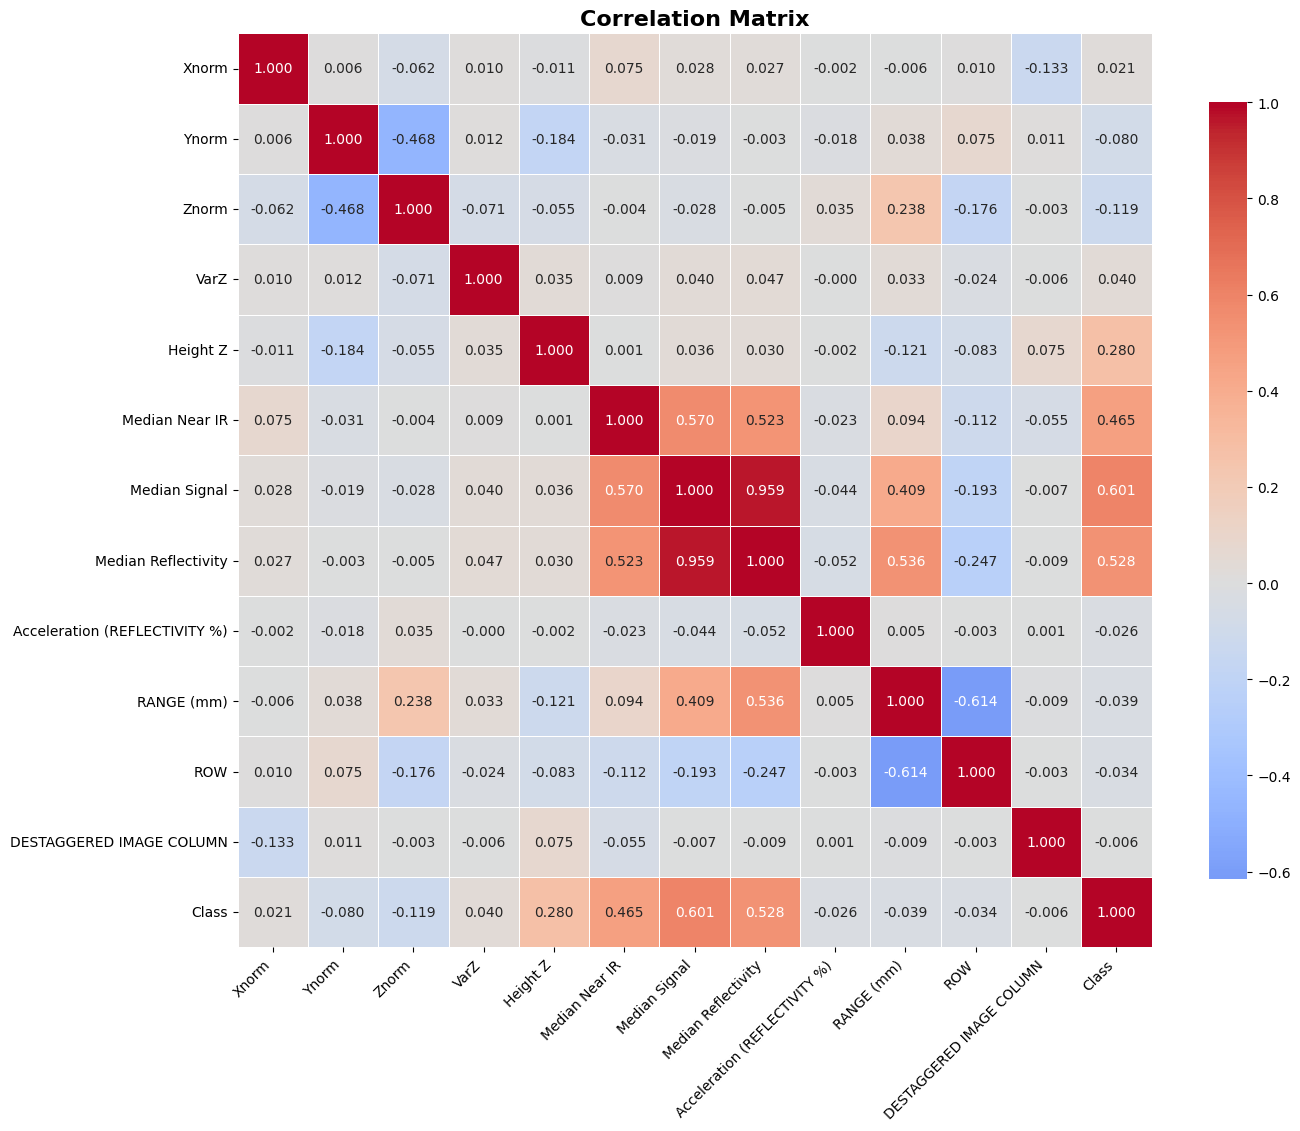

In [6]:
plt.figure(figsize=(14, 12))
sns.heatmap(
    df.corr(), 
    annot=True,          
    fmt='.3f',           
    cmap='coolwarm',     
    center=0,            
    square=True,        
    linewidths=0.5,      
    cbar_kws={'shrink': 0.8},
    xticklabels=df.corr().columns,
    yticklabels=df.corr().columns,
)
plt.title('Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.xticks(rotation=45, ha='right')  
plt.yticks(rotation=0)
plt.show()

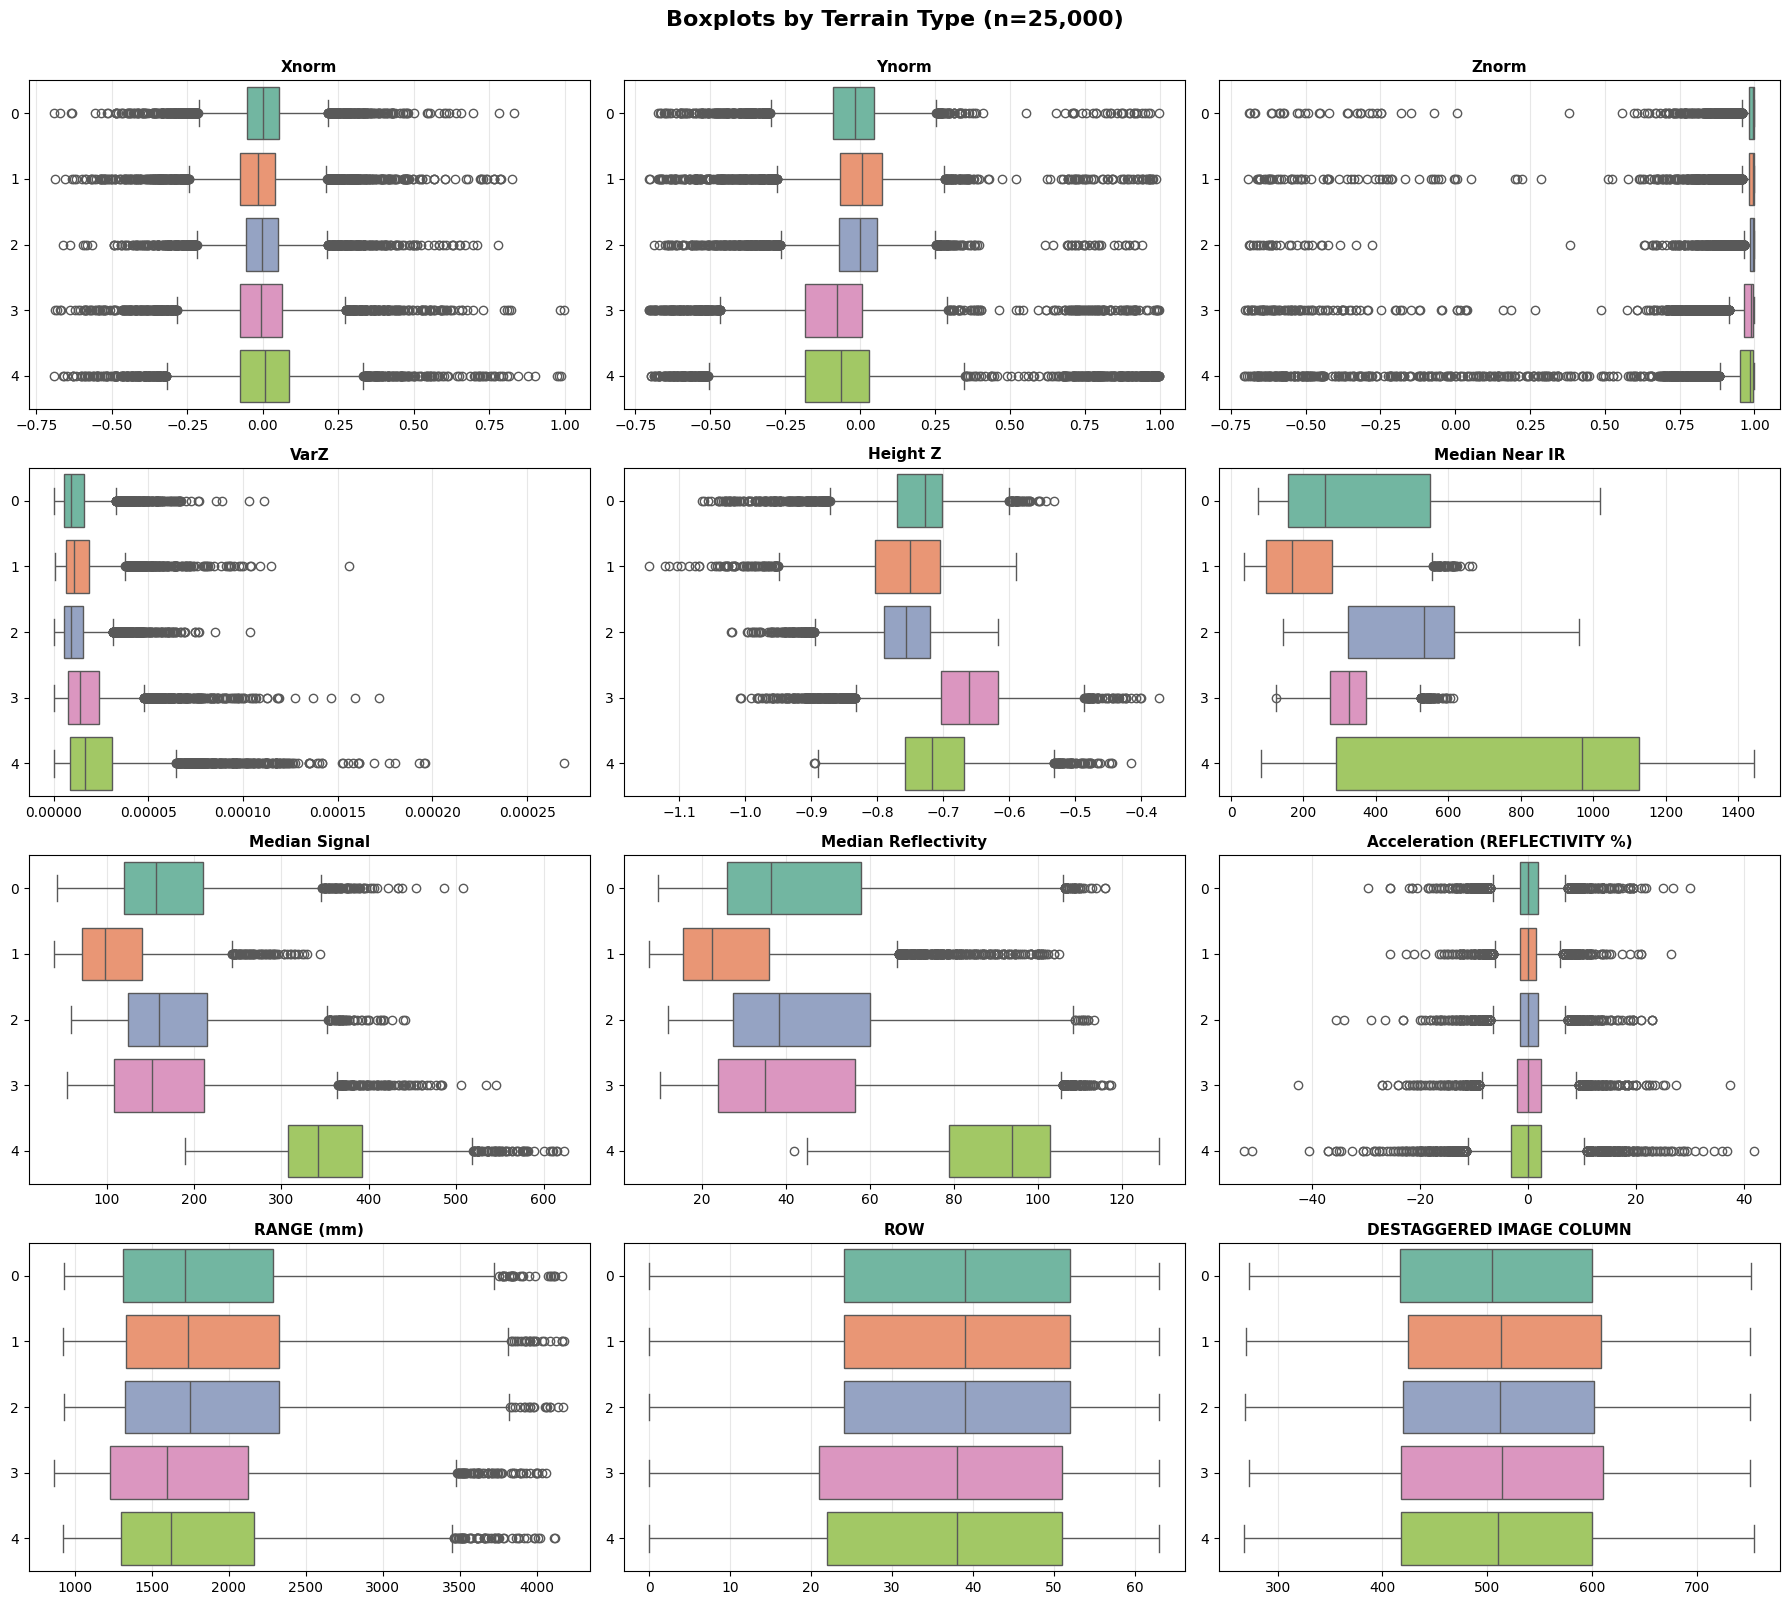

In [ ]:
sample_size_per_class = 5000
classes = df['Class'].unique().to_list()

# Stratified sampling
sampled_dfs = []
for class_name in classes:
    class_df = df.filter(pl.col('Class') == class_name)
    n_samples = min(sample_size_per_class, len(class_df))
    sampled = class_df.sample(n=n_samples, shuffle=True, seed=42)
    sampled_dfs.append(sampled)

# Concatenate all samples
df_sample = pl.concat(sampled_dfs)
df_pd = df_sample.to_pandas()

# Create boxplots
numeric_features = [col for col in df_sample.columns if col != 'Class']

n_cols = 3
n_rows = (len(numeric_features) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten()

for idx, feature in enumerate(numeric_features):
    sns.boxplot(
        data=df_pd, 
        y='Class', 
        x=feature, 
        hue='Class',
        palette='Set2',
        legend=False,
        ax=axes[idx], 
        orient='h'
    )
    axes[idx].set_title(f'{feature}', fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('')
    axes[idx].set_xlabel('')
    axes[idx].grid(axis='x', alpha=0.3)

for idx in range(len(numeric_features), len(axes)):
    axes[idx].set_visible(False)

plt.suptitle(f'Boxplots by Terrain Type (n={len(df_sample):,})', 
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

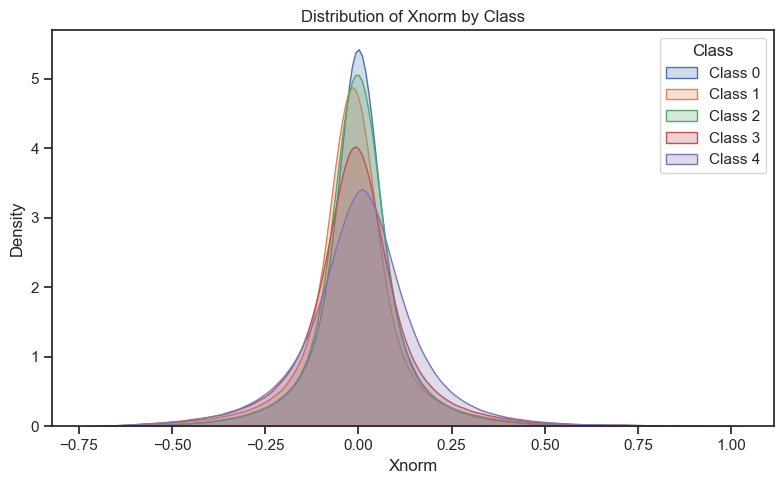

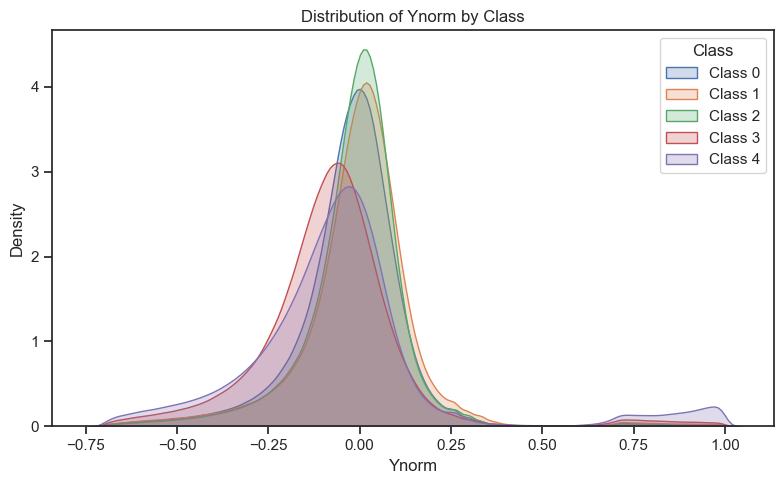

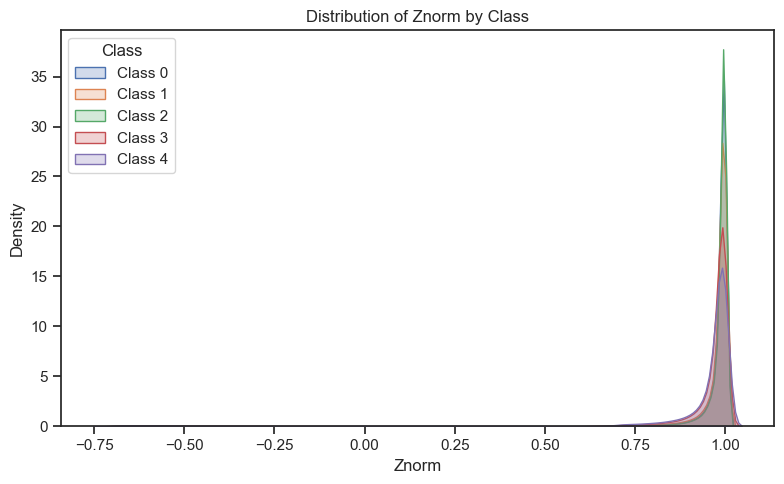

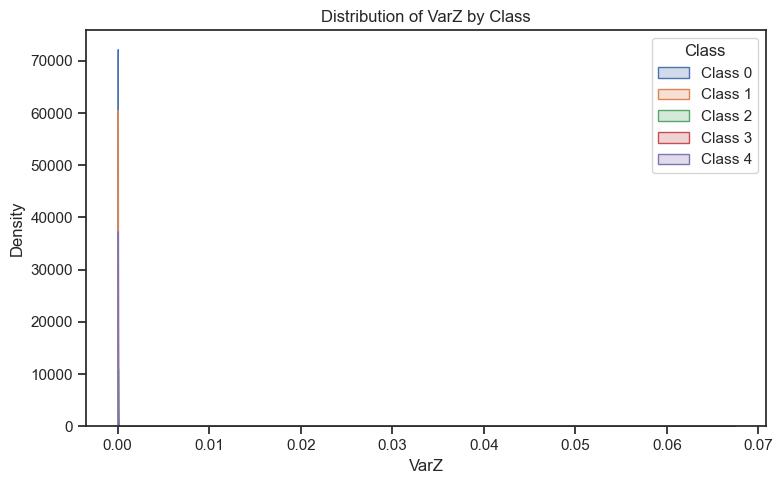

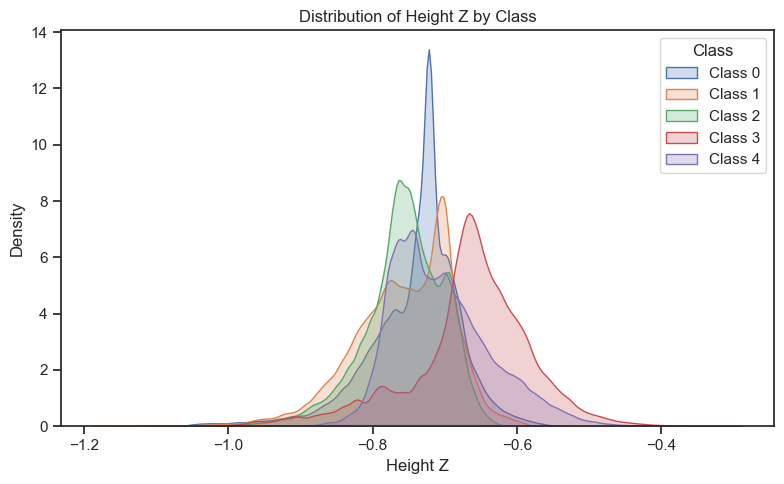

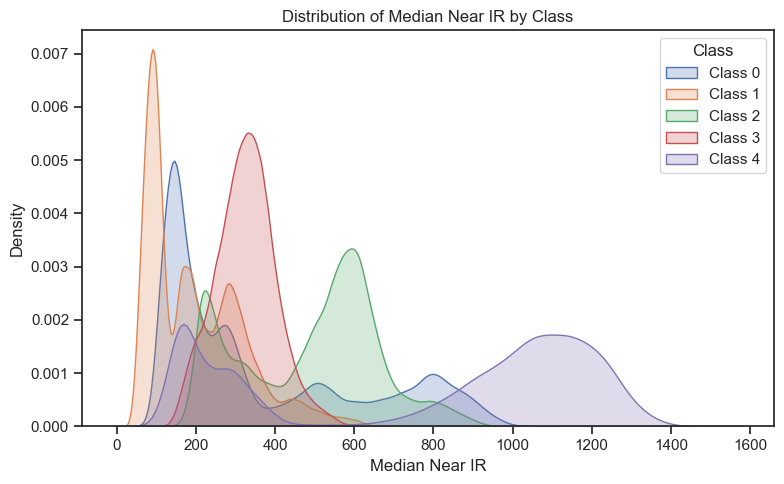

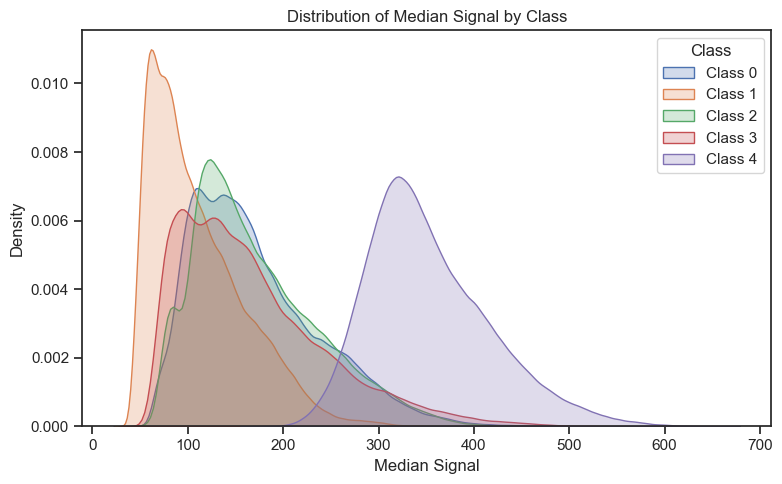

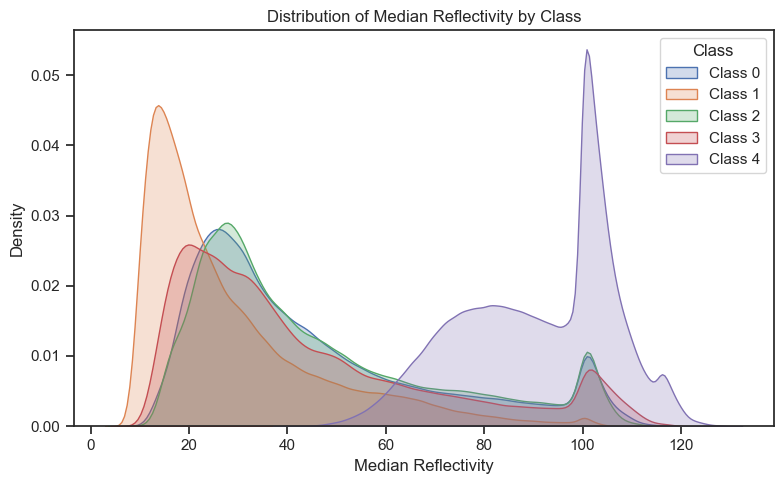

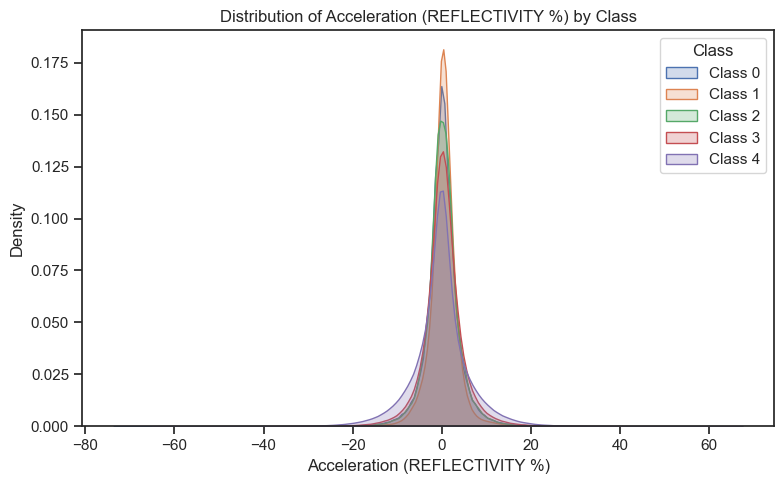

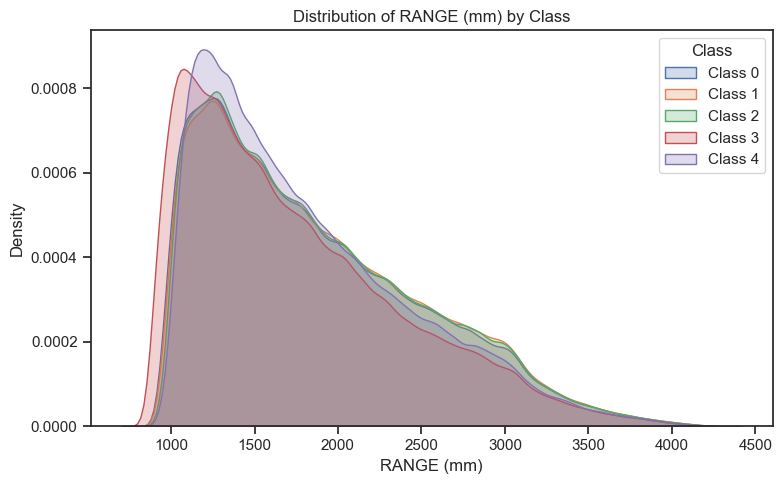

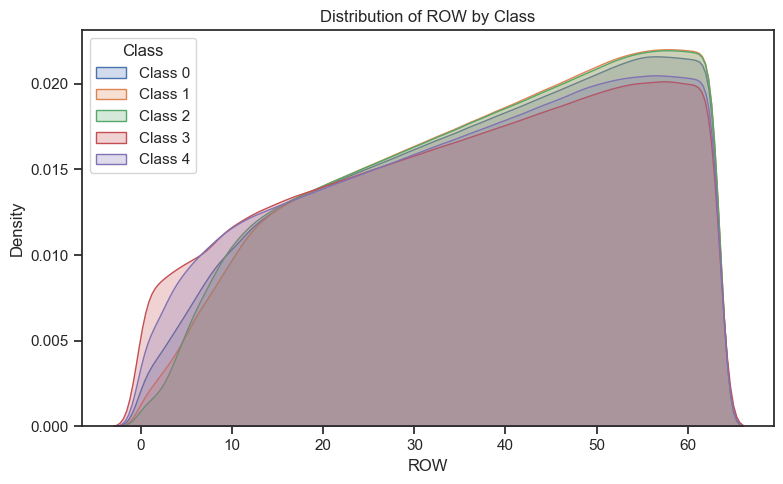

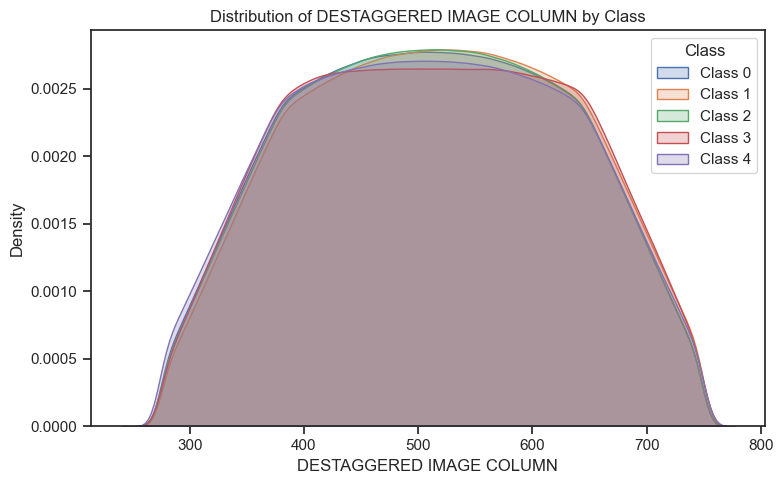

In [39]:
numeric_cols = [col for col, dtype in zip(df.columns, df.dtypes)
                if dtype in (pl.Float32, pl.Float64, pl.Int32, pl.Int64) if col != 'Class']

classes = df["Class"].unique().to_list()

for feature in numeric_cols:
    plt.figure(figsize=(8,5))
    for c in classes:
        subset = df.filter(pl.col("Class") == c)
        arr = subset[feature].drop_nulls().to_numpy()

        if len(arr) > 1:
            sns.kdeplot(arr, fill=True, label=f"Class {c}")

    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.title(f"Distribution of {feature} by Class")
    plt.legend(title="Class")
    plt.tight_layout()
    plt.show()

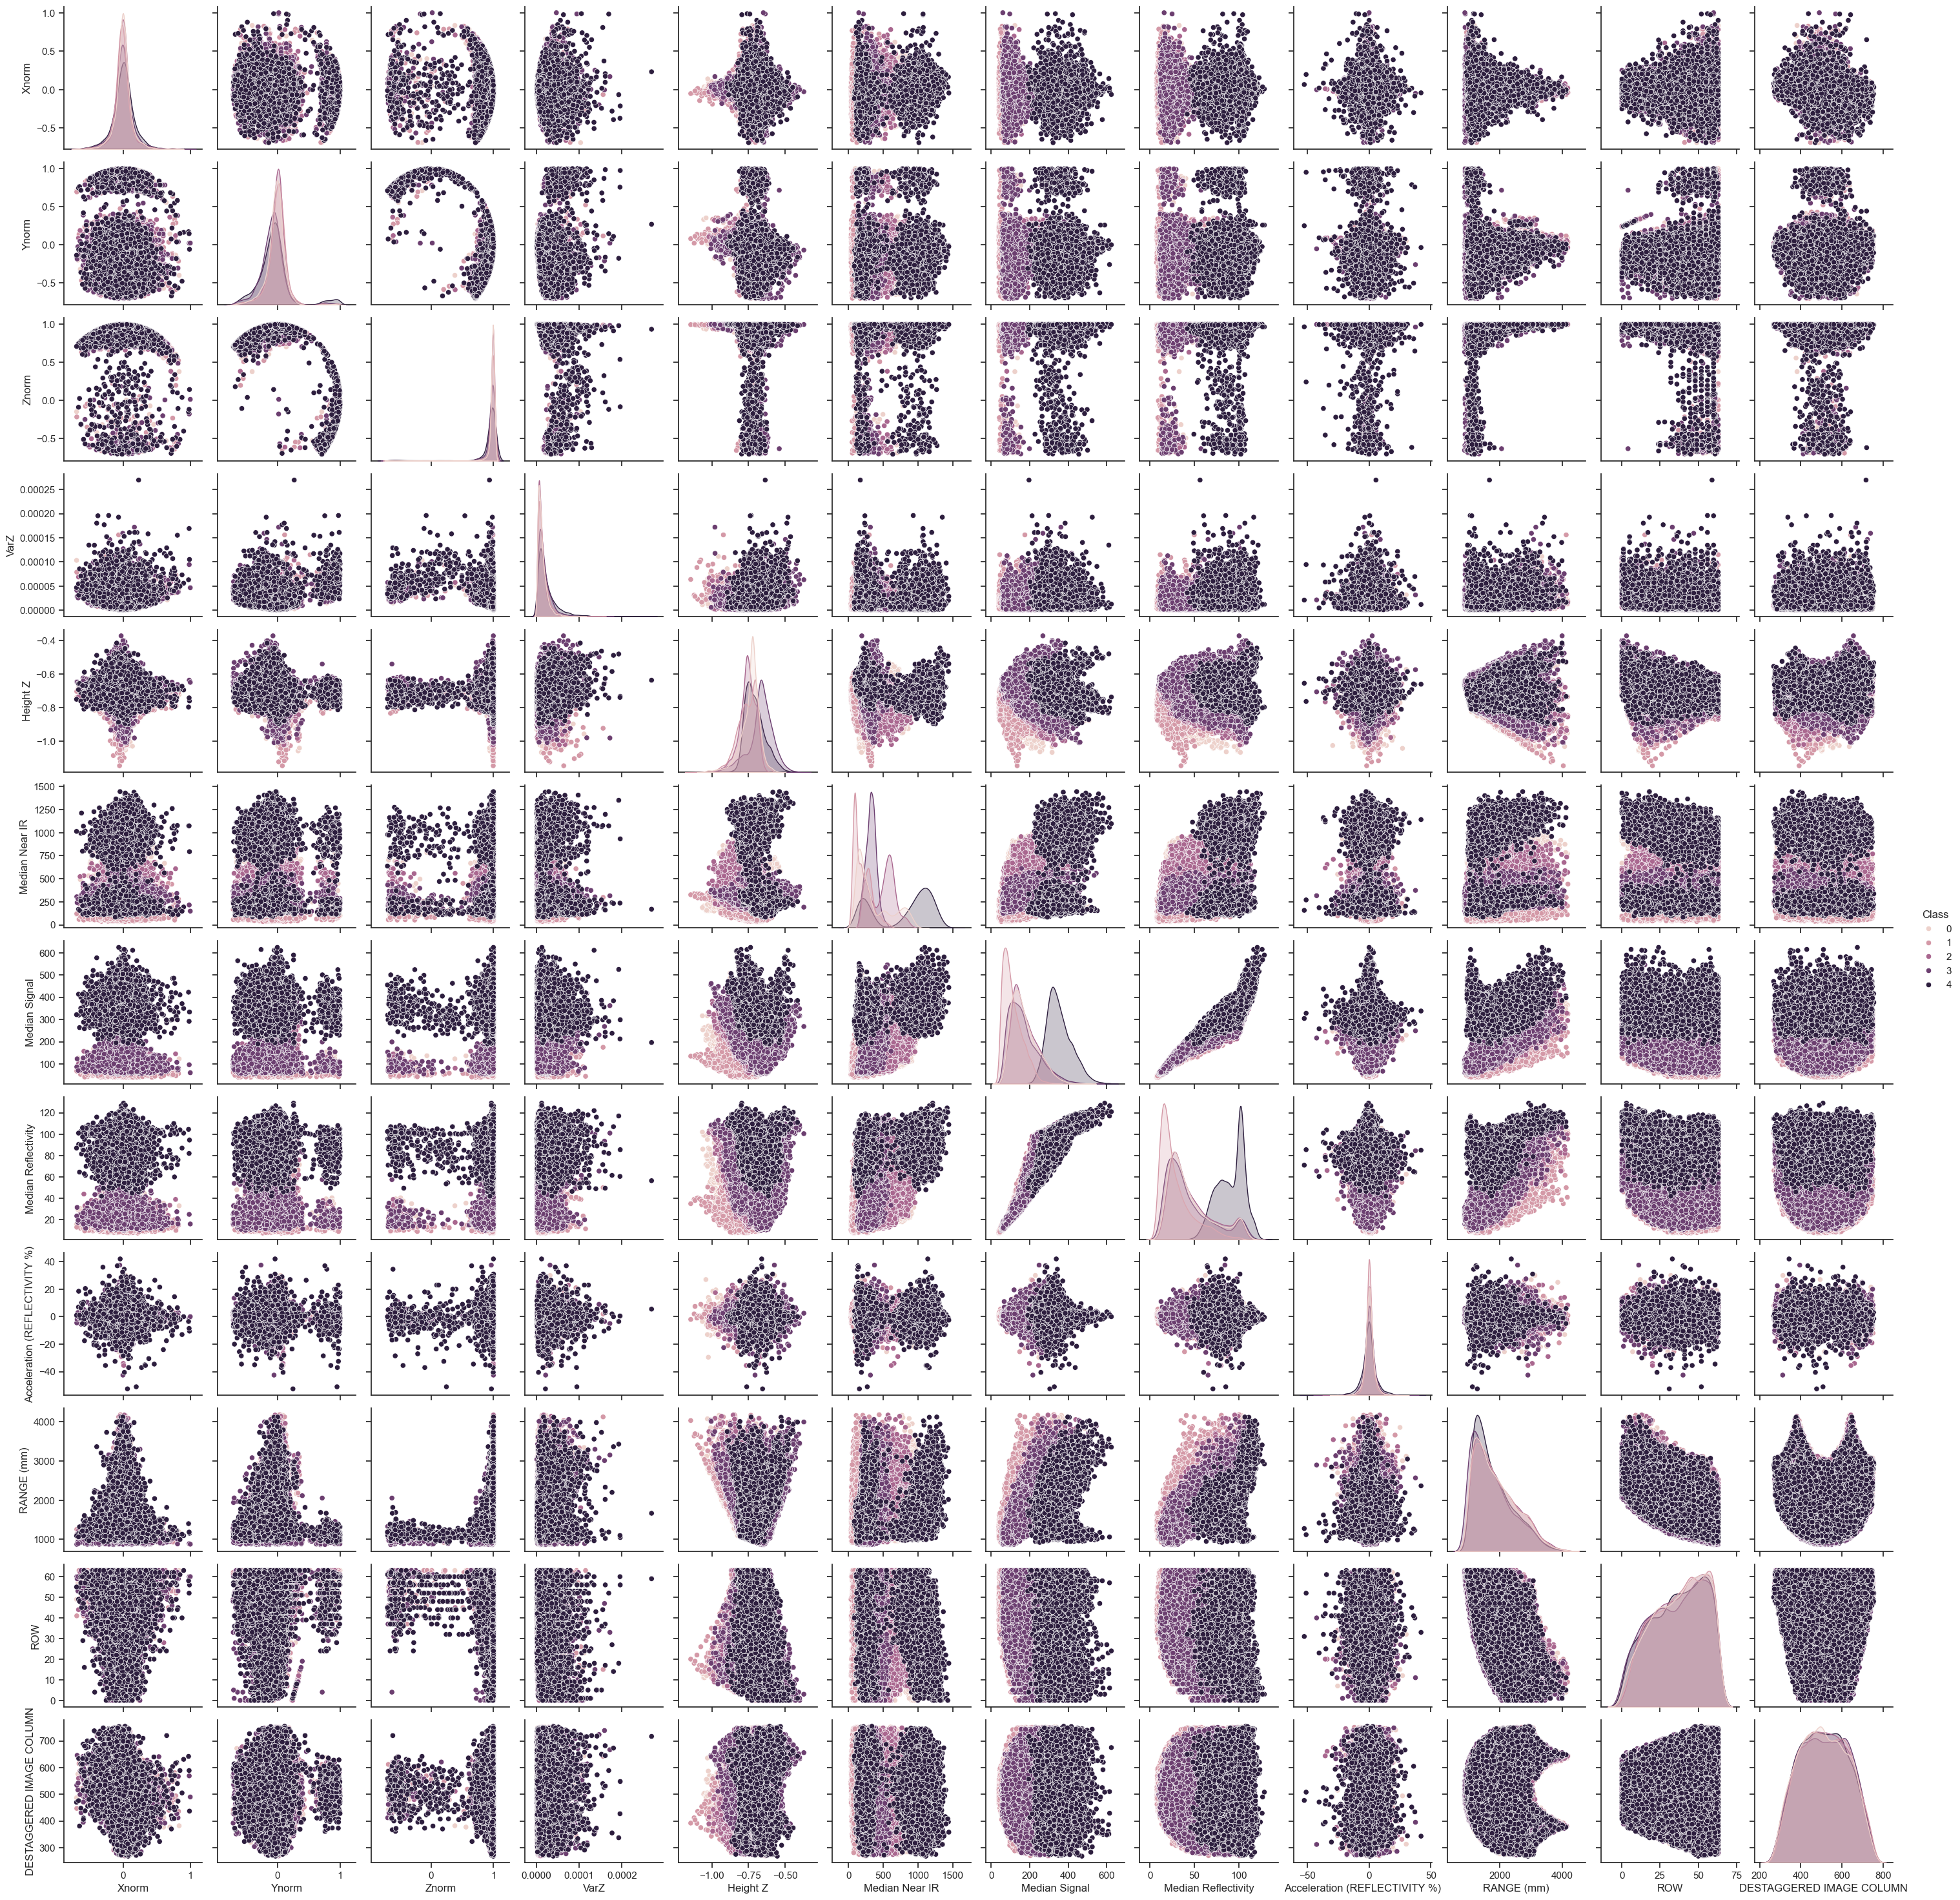

In [25]:
features = df_pd.drop(["Class"], axis=1).columns 
fig = px.scatter_matrix(data_frame=df_pd, 
                        dimensions=features, 
                        color=df_pd['Class']) 
fig.update_traces(marker = dict(size=4), diagonal_visible=False, showupperhalf=False) 
fig.update_layout(width=900, height=600, title="Terrain Traversability Analysis", font_size=9) 

sns.set_theme(style="ticks") 
sns.pairplot(df_pd, hue="Class")